In [12]:
#Manuel Aragon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')


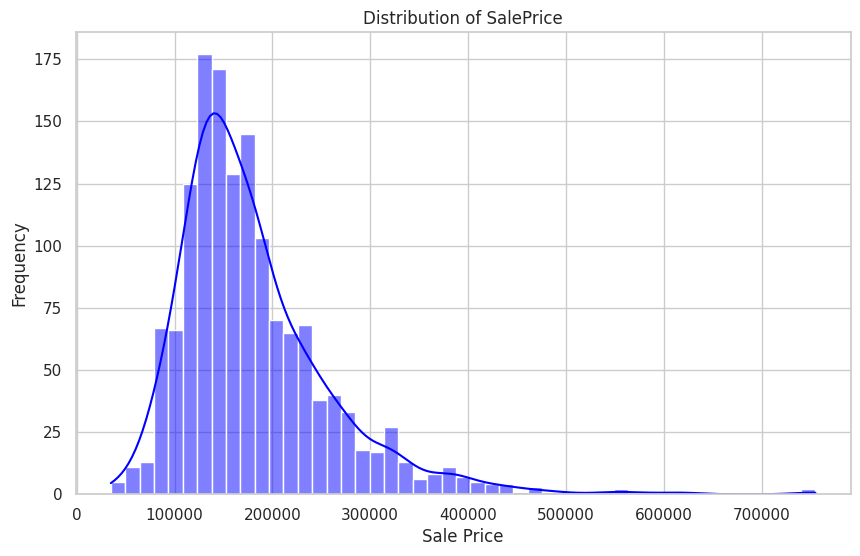

In [13]:
#Analyze Distribution of sales price
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, color='blue')
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


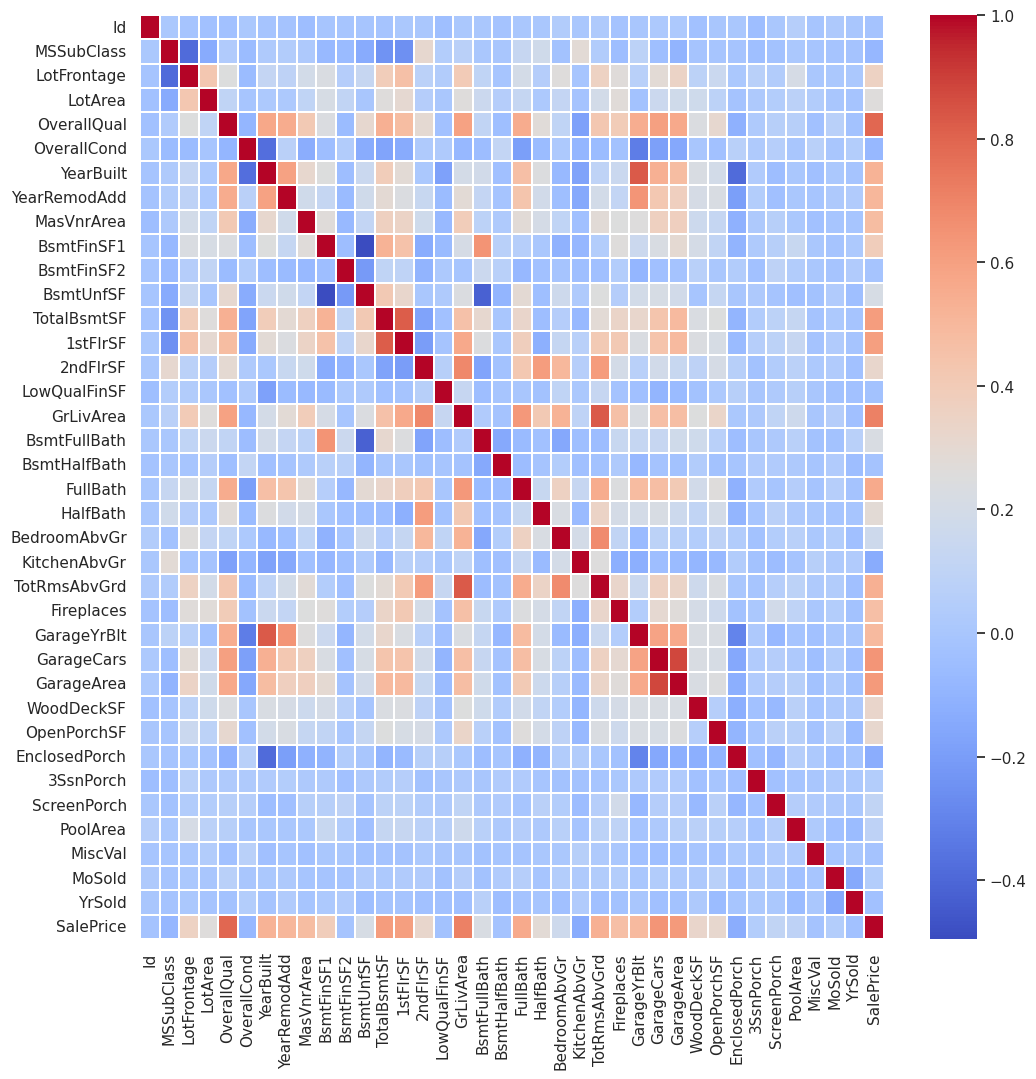

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


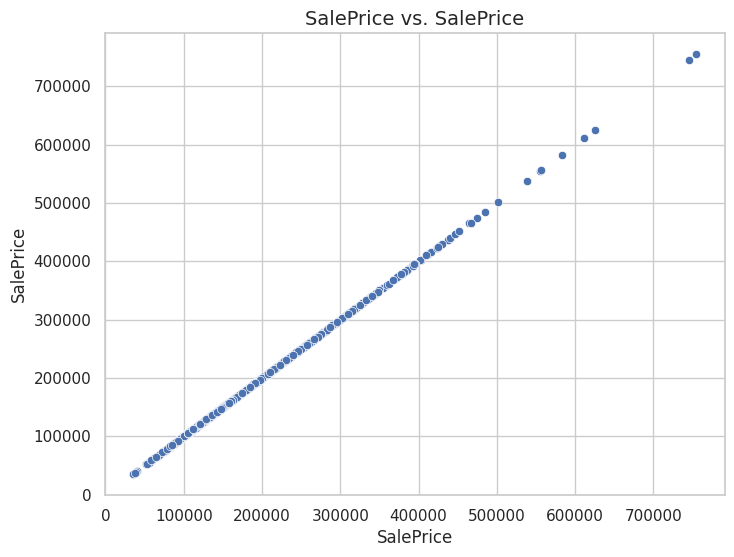

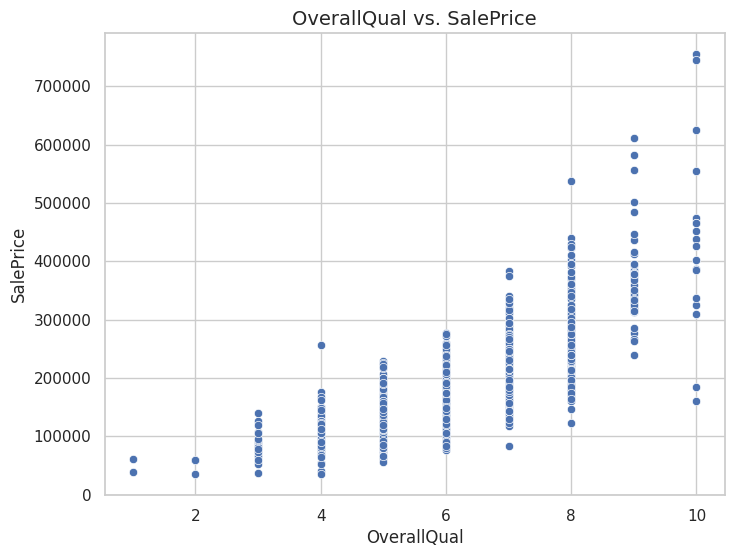

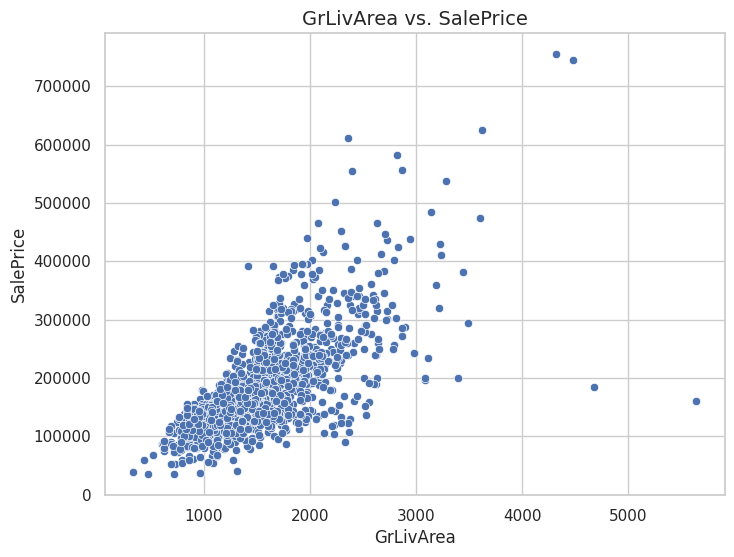

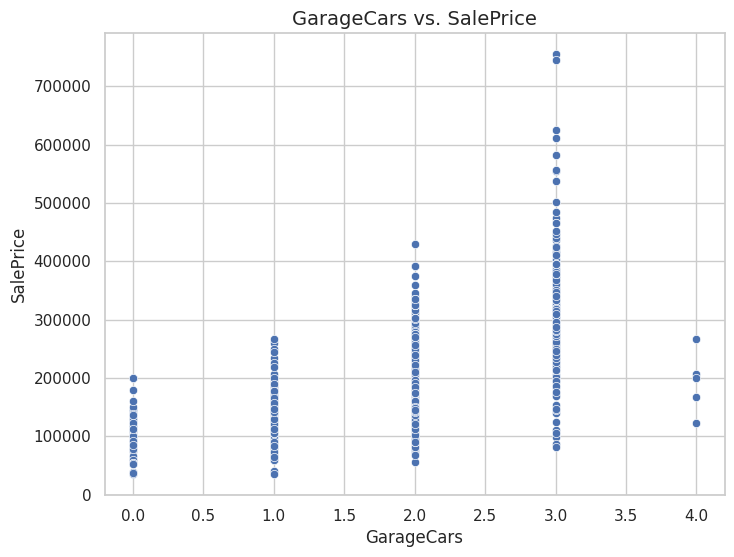

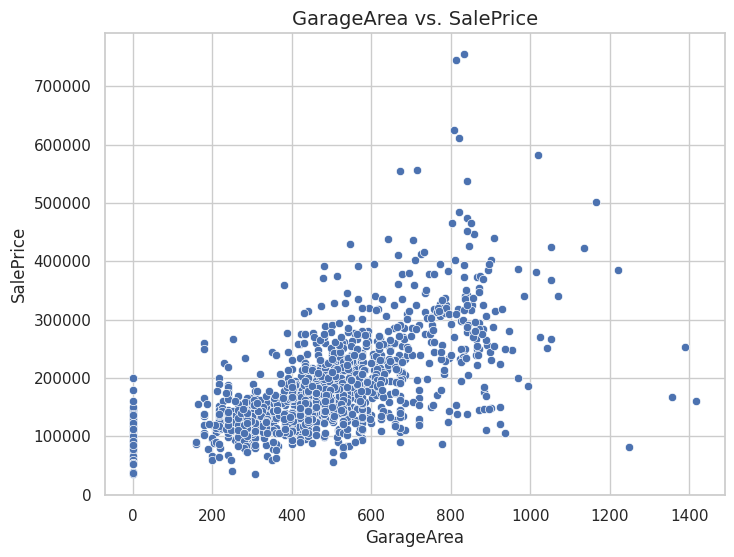

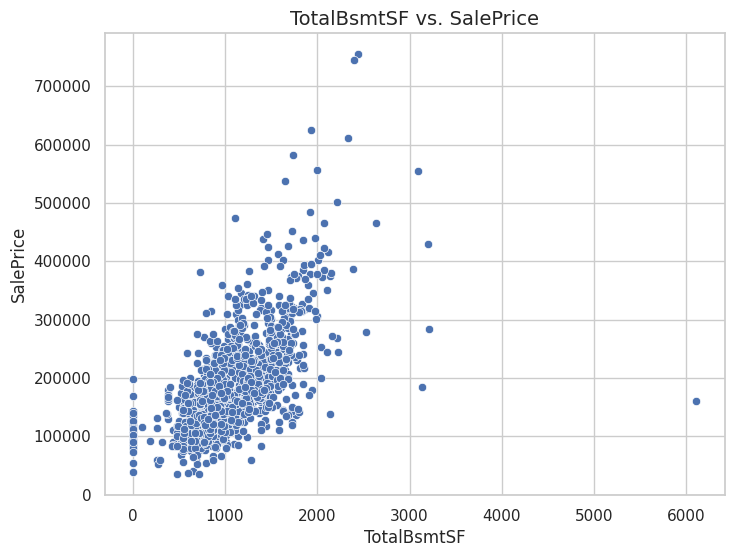

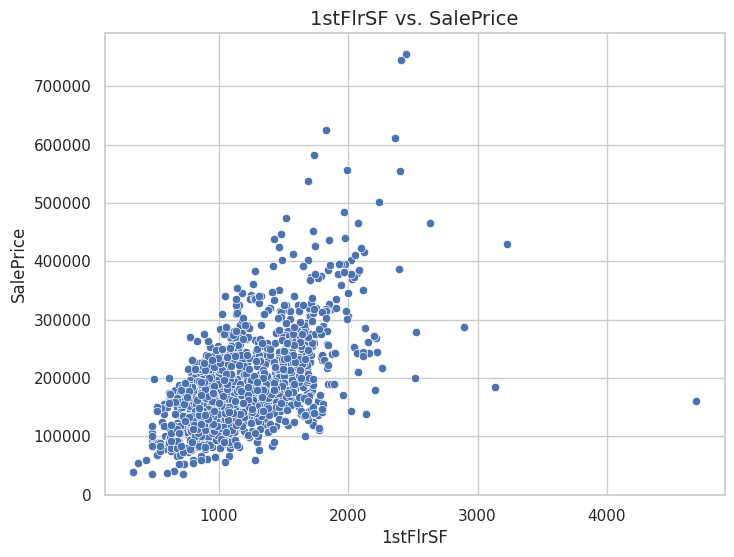

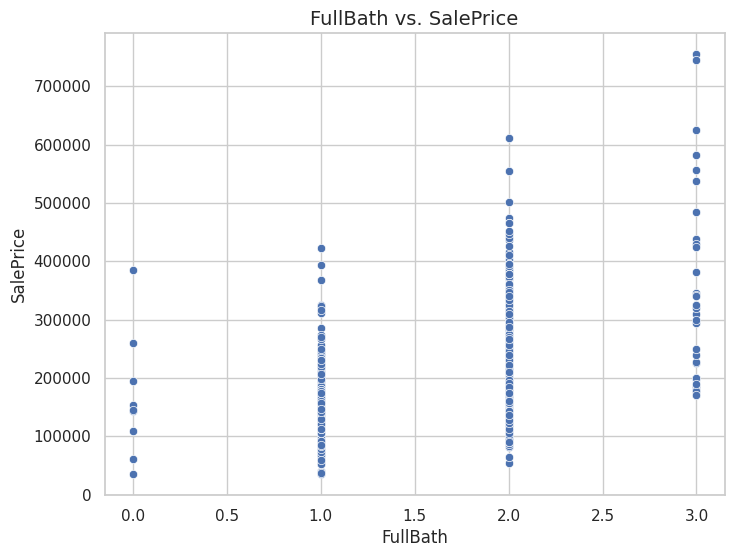

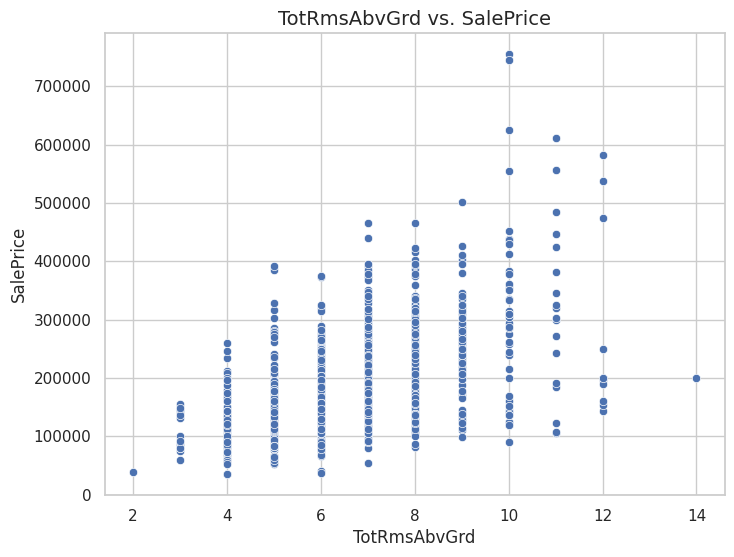

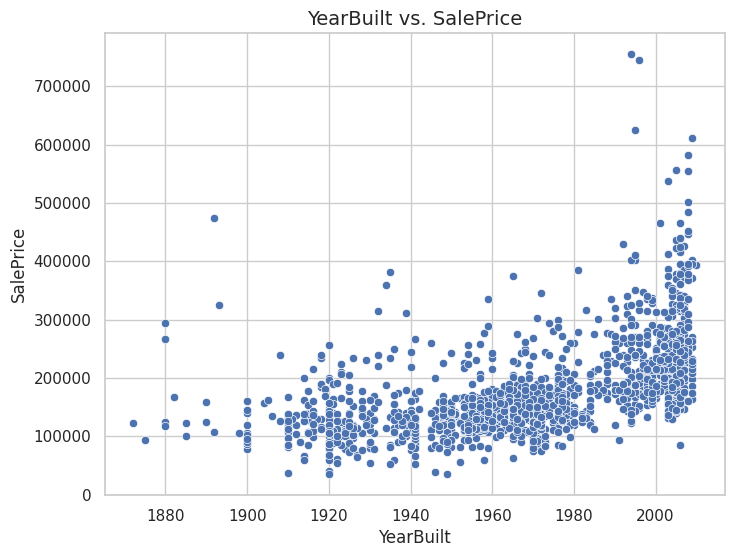

In [14]:
#Heat Map to visualize the correlation between features and the target variable using a heatmap
corr = train.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.1f', linewidths=.1)
plt.show()

# Display top 10 most correlated features with 'SalePrice'
top_corr_features = corr['SalePrice'].sort_values(ascending=False).head(10).index
print(top_corr_features)


# Create scatter plots for each of the top 10 correlated features against 'SalePrice'
for feature in top_corr_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='SalePrice', data=train)
    plt.title(f'{feature} vs. SalePrice', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('SalePrice', fontsize=12)
    plt.show()

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Align columns of the test dataset with the training dataset
missing_cols = set(train.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0
test = test[train.columns]


# Fill missing values in train and test data separately
train = train.fillna(train.median())
test = test.fillna(test.median())

# One-hot encode categorical features in train and test data separately
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Standardize numerical features in train and test data separately
scaler = StandardScaler()
numerical_features_train = train.select_dtypes(include=[np.number]).columns
numerical_features_test = test.select_dtypes(include=[np.number]).columns

# Only use columns from the training dataset
common_features = numerical_features_train.intersection(numerical_features_test)

train[common_features] = scaler.fit_transform(train[common_features])
test[common_features] = scaler.transform(test[common_features])  # Use the same scaler for test data


# Extract target variable
train_target = train['SalePrice']
train_data = train.drop('SalePrice', axis=1)

# Calculate the correlation matrix
corr_matrix = train.corr()

# Display top 10 most and 5 least correlated features with 'SalePrice'
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False).head(11).index
print('Top 10 most correlated features with SalePrice:\n', top_corr_features)

least_corr_features = corr_matrix['SalePrice'].sort_values(ascending=True).head(5).index
print('Top 5 least correlated features with SalePrice:\n', least_corr_features)


/tmp/ipykernel_41266/3799137757.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train = train.fillna(train.median())
/tmp/ipykernel_41266/3799137757.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test = test.fillna(test.median())


Top 10 most correlated features with SalePrice:
 Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd',
       'YearBuilt'],
      dtype='object')
Top 5 least correlated features with SalePrice:
 Index(['ExterQual_TA', 'KitchenQual_TA', 'BsmtQual_TA', 'GarageFinish_Unf',
       'MasVnrType_None'],
      dtype='object')


Linear Regression MAE: 0.289524317212457
Linear Regression MSE: 0.2253907864941458
Linear Regression R^2 score: 0.7779174885888029
Linear Regression training time: 0.18899941444396973 seconds
Decision Tree MAE: 0.33947715124527905
Decision Tree MSE: 0.28054007531966174
Decision Tree R^2 score: 0.7162128808296531
Decision Tree training time: 0.1593029499053955 seconds
Random Forest MAE: 0.2559824927710639
Random Forest MSE: 0.16846379522114588
Random Forest R^2 score: 0.8320949205857442
Random Forest training time: 7.406664848327637 seconds


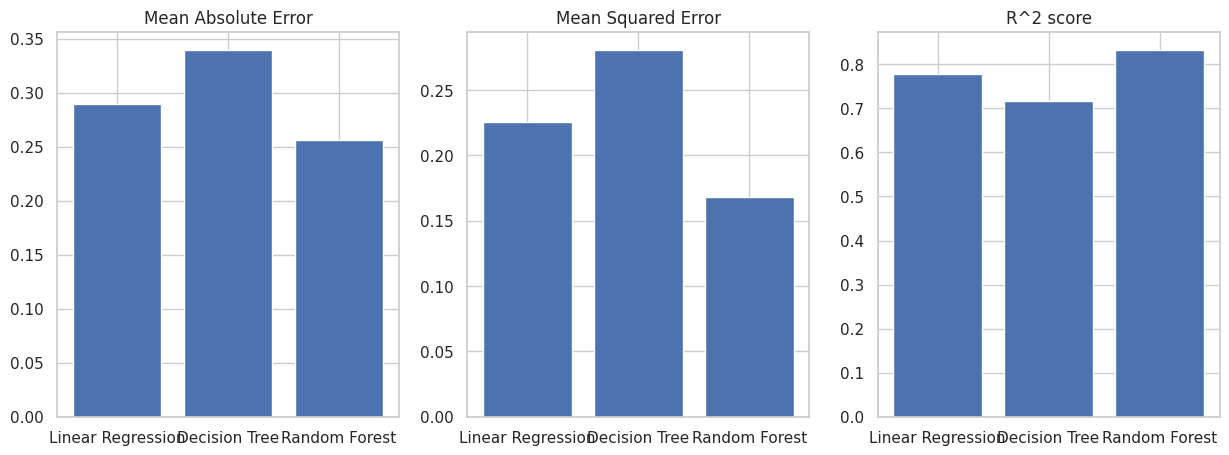

Tuned Decision Tree MAE: 0.3033047408296644
Tuned Decision Tree MSE: 0.22214111463568015
Tuned Decision Tree R^2 score: 0.7768225306047312
Tuned Decision Tree training and tuning time: 3.6255569458007812 seconds
Tuned Random Forest MAE: 0.2550678127462268
Tuned Random Forest MSE: 0.16668922224138263
Tuned Random Forest R^2 score: 0.8342646722964602
Tuned Random Forest training and tuning time: 535.9560358524323 seconds


In [23]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Prepare the data
X = train_data[top_corr_features[1:11]]  # Only include the top 10 features
y = train_target

# Implement Linear Regression, Decision Trees, and Random Forest algorithms
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

mae_scores = []
mse_scores = []
r2_scores = []
training_times = []
model_names = []

cv = 5  # Number of cross-validation folds

for name, model in models.items():
    start_time = time.time()
    cv_mae_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    cv_mse_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    cv_r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    mae = np.mean(cv_mae_scores)
    mse = np.mean(cv_mse_scores)
    r2 = np.mean(cv_r2_scores)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)
    training_times.append(time.time() - start_time)
    model_names.append(name)
    print(f"{name} MAE: {mae}")
    print(f"{name} MSE: {mse}")
    print(f"{name} R^2 score: {r2}")
    print(f"{name} training time: {time.time() - start_time} seconds")

# Plot the evaluation metrics
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].bar(model_names, mae_scores)
ax[0].set_title("Mean Absolute Error")
ax[1].bar(model_names, mse_scores)
ax[1].set_title("Mean Squared Error")
ax[2].bar(model_names, r2_scores)
ax[2].set_title("R^2 score")
plt.show()

# Decision Trees with GridSearchCV
params_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

start_dt = time.time()
grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), params_dt, cv=cv, scoring='neg_mean_squared_error')
grid_dt.fit(X, y)
end_dt = time.time()
best_dt = grid_dt.best_estimator_
cv_mae_best_dt = -cross_val_score(best_dt, X, y, cv=cv, scoring='neg_mean_absolute_error')
cv_mse_best_dt = -cross_val_score(best_dt, X, y, cv=cv, scoring='neg_mean_squared_error')
cv_r2_best_dt = cross_val_score(best_dt, X, y, cv=cv, scoring='r2')
mae_best_dt = np.mean(cv_mae_best_dt)
mse_best_dt = np.mean(cv_mse_best_dt)
r2_best_dt = np.mean(cv_r2_best_dt)
print(f"Tuned Decision Tree MAE: {mae_best_dt}")
print(f"Tuned Decision Tree MSE: {mse_best_dt}")
print(f"Tuned Decision Tree R^2 score: {r2_best_dt}")
print(f"Tuned Decision Tree training and tuning time: {end_dt - start_dt} seconds")

#Random Forest with GridSearchCV
params_rf = {
'n_estimators': [10, 50, 100, 150],
'max_depth': [None, 10, 20, 30, 40, 50],
'min_samples_split': [2, 5, 10, 20],
'min_samples_leaf': [1, 2, 4, 8]
}

start_rf = time.time()
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), params_rf, cv=cv, scoring='neg_mean_squared_error')
grid_rf.fit(X, y)
end_rf = time.time()
best_rf = grid_rf.best_estimator_
cv_mae_best_rf = -cross_val_score(best_rf, X, y, cv=cv, scoring='neg_mean_absolute_error')
cv_mse_best_rf = -cross_val_score(best_rf, X, y, cv=cv, scoring='neg_mean_squared_error')
cv_r2_best_rf = cross_val_score(best_rf, X, y, cv=cv, scoring='r2')
mae_best_rf = np.mean(cv_mae_best_rf)
mse_best_rf = np.mean(cv_mse_best_rf)
r2_best_rf = np.mean(cv_r2_best_rf)
print(f"Tuned Random Forest MAE: {mae_best_rf}")
print(f"Tuned Random Forest MSE: {mse_best_rf}")
print(f"Tuned Random Forest R^2 score: {r2_best_rf}")
print(f"Tuned Random Forest training and tuning time: {end_rf - start_rf} seconds")

In [32]:
# Extract target variable and test data
test_target = test['SalePrice']
test_data = test.drop('SalePrice', axis=1)

# Use the best Random Forest model to make predictions on the test data
X_test = test_data[top_corr_features[1:11]]  # Only include the top 10 features
y_pred_rf = best_rf.predict(X_test)

# Evaluate the performance of the Random Forest model on the test data
mae_rf = mean_absolute_error(test_target, y_pred_rf)
mse_rf = mean_squared_error(test_target, y_pred_rf)
r2_rf = r2_score(test_target, y_pred_rf)

print(f"Random Forest MAE on test data: {mae_rf}")
print(f"Random Forest MSE on test data: {mse_rf}")
print(f"Random Forest R^2 score on test data: {r2_rf}")


Random Forest MAE on test data: 2.2591296642674115
Random Forest MSE on test data: 5.95688200987068
Random Forest R^2 score on test data: -3.0204980221205234e+31


In [ ]:
# Use the best Random Forest model to make predictions on the test data
X_test = test_data[top_corr_features[1:11]]  # Only include the top 10 features
y_pred_rf = best_rf.predict(X_test)

# Create a new DataFrame with the predicted sales prices
predictions = pd.DataFrame({'Id': test.index, 'SalePrice': y_pred_rf})

# Write the predictions to a CSV file
predictions.to_csv('predictions.csv', index=False)
